<a href="https://colab.research.google.com/github/AnalyticalHarry/Econometrics/blob/main/UK_%26_US_10_year_treasury_bond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UK & US 10 year treasury bond

### Hemant Thapa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
# fetch US 10-year Treasury yield data
us10_yield = yf.download("^TNX", start="2014-01-01", end="2024-05-01")['Adj Close']

# fetch UK 10-year Gilt yield data from FRED
uk_yield = yf.download("^TYX", start="2014-01-01", end="2024-05-01")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


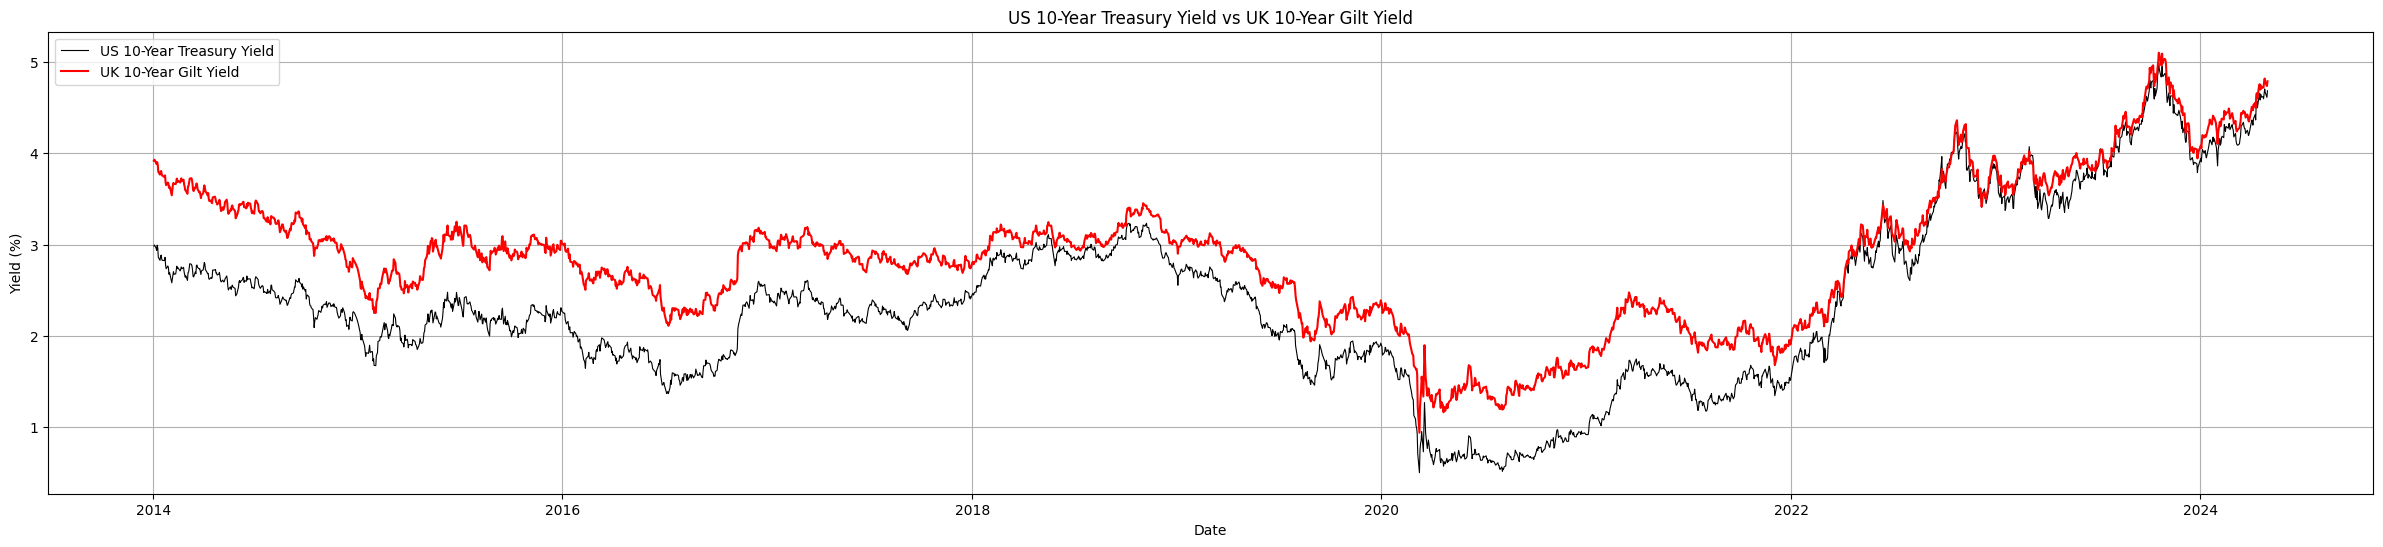

In [3]:
plt.figure(figsize=(30, 6))
plt.plot(us10_yield, label='US 10-Year Treasury Yield', lw=0.8, color='black')
plt.plot(uk_yield, label='UK 10-Year Gilt Yield', lw=1.5, color='red')
plt.title("US 10-Year Treasury Yield vs UK 10-Year Gilt Yield")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.legend()
plt.grid(True)
plt.show()

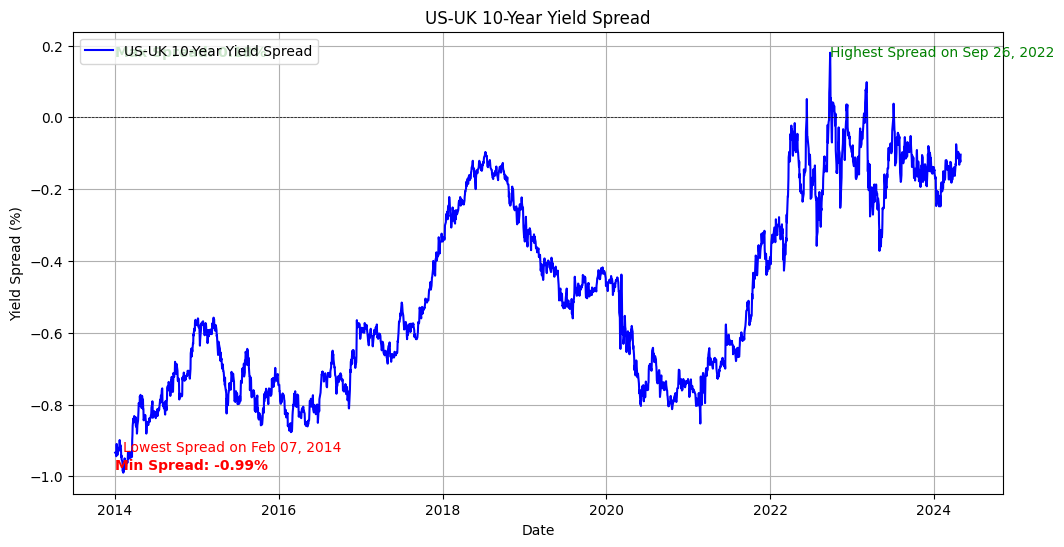

In [4]:
# yield spread
yield_spread = us10_yield - uk_yield


plt.figure(figsize=(12, 6))
plt.plot(yield_spread, label='US-UK 10-Year Yield Spread', lw=1.5, color='blue')
max_pos = yield_spread.max() * 0.9
min_pos = yield_spread.min() * 1
plt.text(yield_spread.index[0], max_pos, f'Max Spread: {yield_spread.max():.2f}%', verticalalignment='bottom', fontsize=10, color='green', fontweight='bold')
plt.text(yield_spread.index[0], min_pos, f'Min Spread: {yield_spread.min():.2f}%', verticalalignment='bottom', fontsize=10, color='red', fontweight='bold')
plt.text(yield_spread.idxmax(), max_pos, f'Highest Spread on {yield_spread.idxmax().strftime("%b %d, %Y")}', verticalalignment='bottom', fontsize=10, color='green')
plt.text(yield_spread.idxmin(), min_pos + 0.05, f'Lowest Spread on {yield_spread.idxmin().strftime("%b %d, %Y")}', verticalalignment='bottom', fontsize=10, color='red')
plt.title("US-UK 10-Year Yield Spread")
plt.xlabel("Date")
plt.ylabel("Yield Spread (%)")
plt.axhline(0, color='black', linestyle='--', lw=0.5)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
us10_yield.shape, uk_yield.shape

((2598,), (2598,))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
X = np.array(uk_yield).reshape(-1, 1)
y = np.array(us10_yield)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Evaluation Metrics:")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Evaluation Metrics:
R-squared: 0.9403
Mean Squared Error (MSE): 0.0548
Root Mean Squared Error (RMSE): 0.2342
Mean Absolute Error (MAE): 0.1967


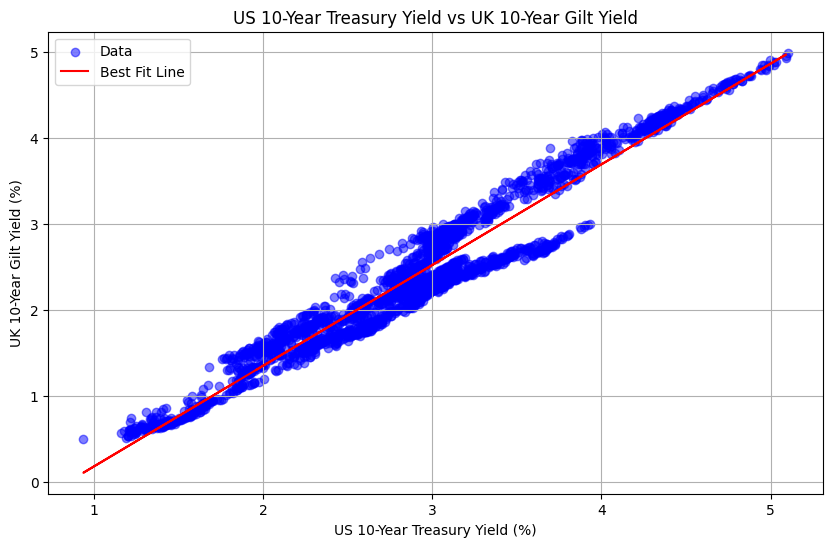

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(uk_yield, us10_yield, color='blue', alpha=0.5, label='Data')
plt.plot(X_test, y_pred, color='red', label='Best Fit Line')
plt.title("US 10-Year Treasury Yield vs UK 10-Year Gilt Yield")
plt.xlabel("US 10-Year Treasury Yield (%)")
plt.ylabel("UK 10-Year Gilt Yield (%)")
plt.grid(True)
plt.legend()
plt.show()

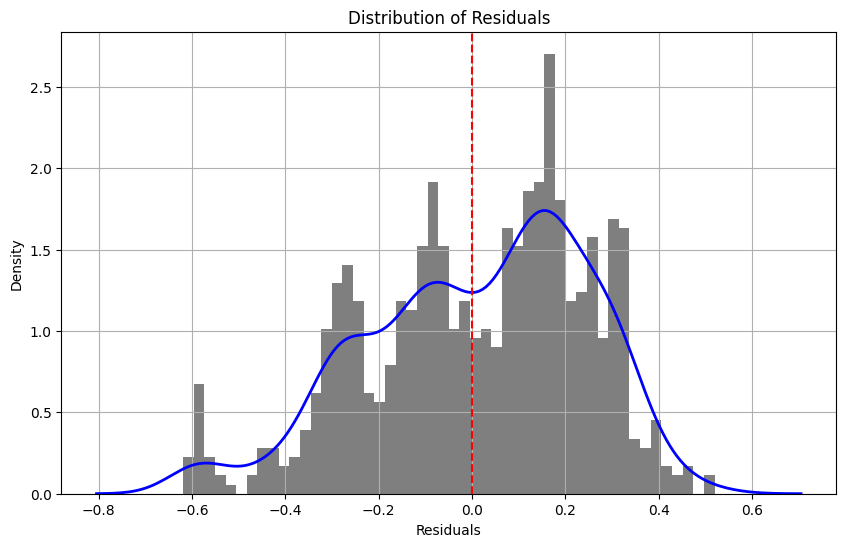

In [12]:
residuals = y_test - y_pred

# distribution of residuals with KDE using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='black', alpha=0.5, density=True)
sns.kdeplot(residuals, color='blue', linestyle='-', linewidth=2)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

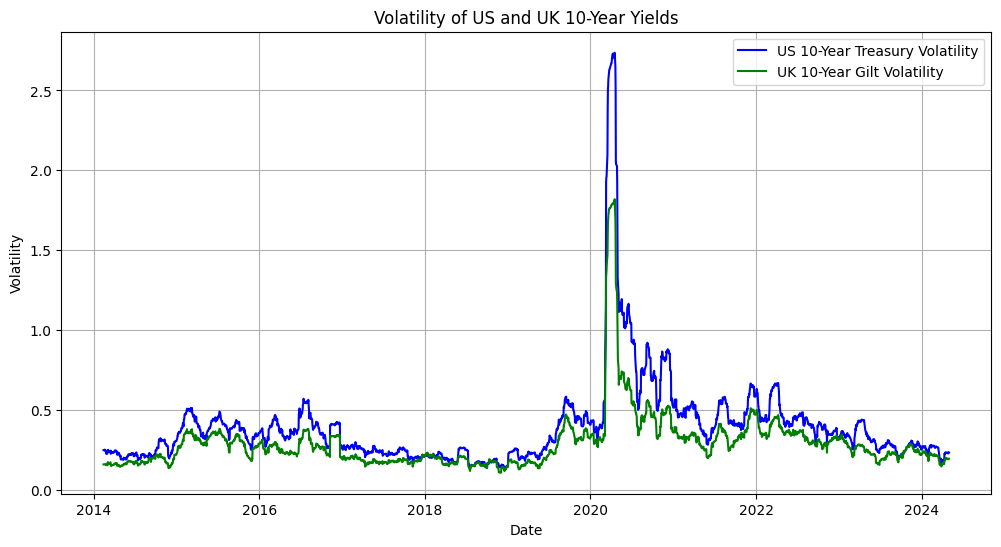

In [13]:
# rolling standard deviation (volatility) of yield changes
# 30-day window for annualised volatility
us10_volatility = us10_yield.pct_change().rolling(window=30).std() * np.sqrt(252)
uk_volatility = uk_yield.pct_change().rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(us10_volatility, label='US 10-Year Treasury Volatility', lw=1.5, color='blue')
plt.plot(uk_volatility, label='UK 10-Year Gilt Volatility', lw=1.5, color='green')
plt.title("Volatility of US and UK 10-Year Yields")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

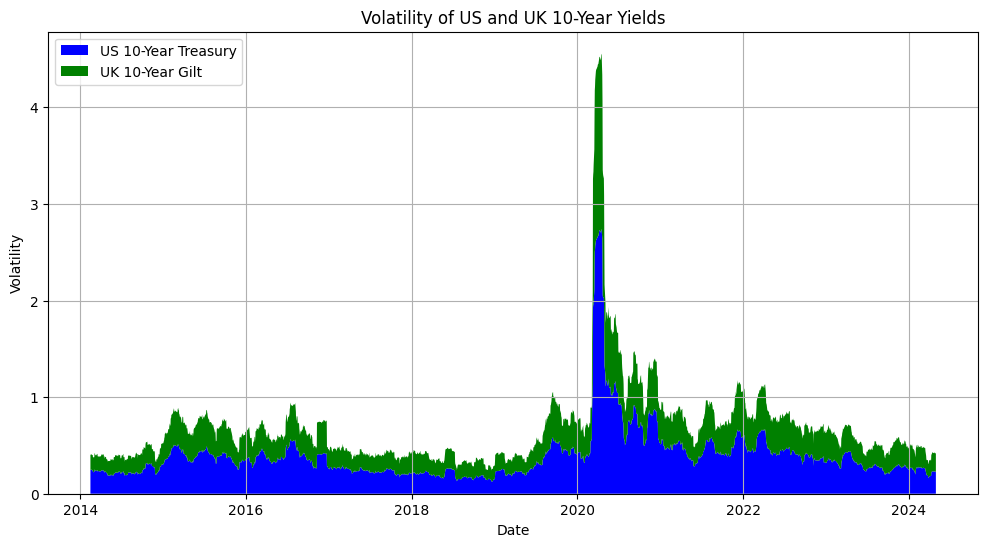

In [14]:
dates = us10_volatility.index
us10_volatility_values = us10_volatility.values
uk_volatility_values = uk_volatility.values

plt.figure(figsize=(12, 6))
plt.stackplot(dates, us10_volatility_values, uk_volatility_values, labels=['US 10-Year Treasury', 'UK 10-Year Gilt'], colors=['blue', 'green'])
plt.title("Volatility of US and UK 10-Year Yields")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()